跨文件夹引用需要切换工作目录

In [ ]:
import os,sys

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

建立系统模型

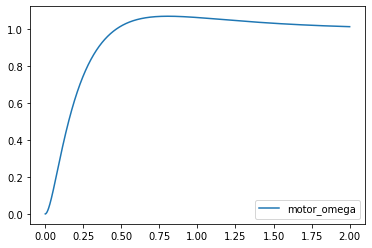

In [2]:
from src.system import System  

# 电机参数
J = 0.01
b = 0.1
Ke = 0.01
Kt = 0.01
R = 1
L = 0.5  

# PID 参数
Kp = 75 
Ki = 100 
Kd = 10  
r = 1  # 给定输入

sys = System()

motor = sys.createModule('motor')

# 转角
theta = motor.createState(name="theta", func=lambda: omega)
# 转速
omega = motor.createState(name="omega", func=lambda: -b/J*omega + Kt/J*i )
# 角加速度
alpha = motor.createState(name="alpha", func=lambda: -b/J*alpha + Kt/J*i.prime())  
# 电枢电流
i = motor.createState(name="i", func=lambda: -Ke/L*omega  -R/L*i + u/L)  

pid = sys.createModule('pid')

# 控制器部分，现在是作为电机的一部分，理论上应该单独拿出来作为一个模块的
# 误差e = r-omega
e = pid.createState(name="e", func=lambda: -alpha, init_value=r)  
# 控制器输出电压
u = pid.createState(name="u", func=lambda: Kp*e.prime() + Ki*e - Kd*alpha.prime(), init_value=Kp*e)


sys.run(2)

sys.draw(['motor_omega'])


继续运行

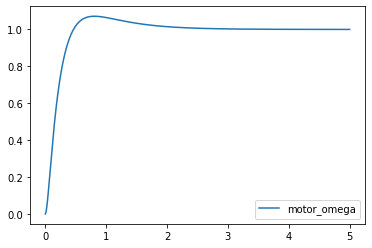

In [3]:

sys.run(3)

sys.draw(['motor_omega'])

重置系统状态，重新运行5 秒

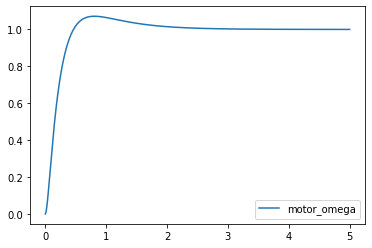

In [5]:
sys.reset()
sys.run(5)

sys.draw(['motor_omega'])